{'10': 1024}


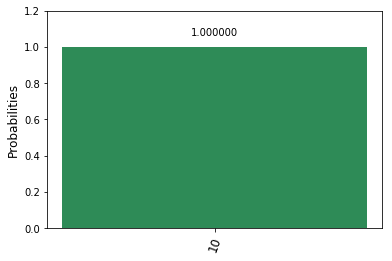

In [2]:
### ２量子ビットでのグローバーのアルゴリズムの計算 ###

### 参考 ###
### https://www.ibm.com/developerworks/jp/cloud/library/cl-quantum-computing/index.html ###
### https://qiita.com/kyamaz/items/eebd0f7734c8a33de2ad ###
from qiskit import *
from qiskit.tools.visualization import *
#ビット数
bn = 2
#検索したい値
serachInput = "10"
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q,c)
#２量子ビットを均一な重ね合わせ状態にするためにアダマールゲートをかける
for i in range (bn):
    qc.h(q[i])

if serachInput ==  "00":
    #００（１０進数だと０）を見つけ出すために、S(π/4位相)ゲート＋制御Zゲートで００だけ位相を反転させる
    qc.s(q[0])
    qc.s(q[1])
    qc.cz(q[0],q[1])
    qc.s(q[0])    
    qc.s(q[1])
    
elif serachInput ==  "01":
    #０１（１０進数だと０）を見つけ出すために、S(π/4位相)ゲート＋制御Zゲートで０１だけ位相を反転させる
    qc.s(q[1])
    qc.cz(q[0],q[1])
    qc.s(q[1])    

elif serachInput ==  "10":
    #１０（１０進数だと２）を見つけ出すために、S(π/4位相)ゲート＋制御Zゲートで１０だけ位相を反転させる
    qc.s(q[0])
    qc.cz(q[0],q[1])
    qc.s(q[0])

elif serachInput ==  "11":
    #１１（１０進数だと３）を見つけ出すために、制御Zゲートで１１だけ位相を反転させる
    qc.cz(q[0],q[1])

#平均値での反転（拡散変換）
for i in range(bn):
    qc.h(q[i])
    qc.x(q[i])
qc.cz(q[0],q[1])
for i in range(bn):
    qc.x(q[i])
    qc.h(q[i])

#確率をグラフで出す
for i in range (bn):
    qc.measure(q[bn-1-i],c[i])
r = execute(qc,'local_qasm_simulator').result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)

#位相反転した確率振幅をベクトルで出す
#r = execute(qc,'local_statevector_simulator').result()
#print(r.get_statevector())

{'000': 36, '001': 37, '010': 26, '011': 21, '100': 29, '101': 41, '110': 35, '111': 799}


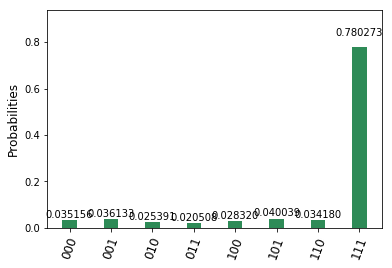

In [31]:
### ３量子ビットでのグローバーのアルゴリズムの計算 ###
### Glover演算が１回の場合 ###

from qiskit import *
from qiskit.tools.visualization import *
#関数定義
#制御・制御Zゲート(入力が全て１１１の時に位相を反転する)
def ccz(qci,q0,q1,q2):
    qci.h(q2)
    qci.ccx(q0,q1,q2)
    qci.h(q2)
#Glover演算（マーキングターゲット＝’１１１’）
def glover(qci,q0,q1,q2):
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.h(i)
        qci.x(i)
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.x(i)
        qci.h(i)
    
#ビット数
bn = 3
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q,c)
for i in range(bn):
    qc.h(q[i])
glover(qc,q[0],q[1],q[2])

#確率をグラフで出す
for i in range (bn):
    qc.measure(q[bn-1-i],c[i])
r = execute(qc,'local_qasm_simulator').result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)
    

{'000': 6, '001': 7, '010': 5, '011': 7, '100': 11, '101': 5, '110': 6, '111': 977}


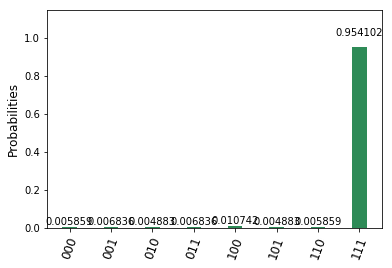

In [8]:
### ３量子ビットでのグローバーのアルゴリズムの計算 ###
### Glover演算が２回の場合 ###

from qiskit import *
from qiskit.tools.visualization import *
#関数定義
#制御・制御Zゲート(入力が全て１１１の時に位相を反転する)
def ccz(qci,q0,q1,q2):
    qci.h(q2)
    qci.ccx(q0,q1,q2)
    qci.h(q2)
#Glover演算（マーキングターゲット＝’１１１’）
def glover(qci,q0,q1,q2):
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.h(i)
        qci.x(i)
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.x(i)
        qci.h(i)
    
#ビット数
bn = 3
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q,c)
for i in range(bn):
    qc.h(q[i])
for k in range(2):
    glover(qc,q[0],q[1],q[2])

#確率をグラフで出す
for i in range (bn):
    qc.measure(q[bn-1-i],c[i])
r = execute(qc,'local_qasm_simulator').result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)
    

{'000': 102, '001': 94, '010': 119, '011': 102, '100': 81, '101': 70, '110': 116, '111': 340}


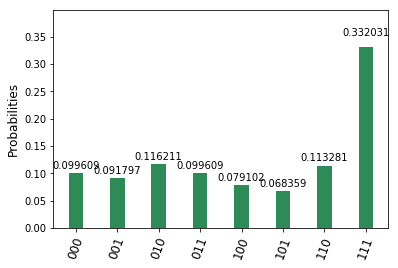

In [2]:
### ３量子ビットでのグローバーのアルゴリズムの計算 ###
### Glover演算が３回の場合 ###

from qiskit import *
from qiskit.tools.visualization import *
#関数定義
#制御・制御Zゲート(入力が全て１１１の時に位相を反転する)
def ccz(qci,q0,q1,q2):
    qci.h(q2)
    qci.ccx(q0,q1,q2)
    qci.h(q2)
#Glover演算（マーキングターゲット＝’１１１’）
def glover(qci,q0,q1,q2):
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.h(i)
        qci.x(i)
    ccz(qci,q0,q1,q2)
    for i in [q0,q1,q2]:
        qci.x(i)
        qci.h(i)
    
#ビット数
bn = 3
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q,c)
for i in range(bn):
    qc.h(q[i])
for k in range(bn):
    glover(qc,q[0],q[1],q[2])

#確率をグラフで出す
for i in range (bn):
    qc.measure(q[bn-1-i],c[i])
r = execute(qc,'local_qasm_simulator').result()
rc = r.get_counts()
print(rc)
plot_histogram(rc)
    

In [19]:
N個のデータベースにおけるグローバー探索アルゴリズムの最適施行回数Ｋは
K＝(π/4×√N)-1/2
で与えられる。
上記のＮ＝８（３量子ビットで８つの状態を持てる）の場合はＫ≒１．７２となるので、２回施行した場合が最適となり上記実験と一致する。

#http://quantum.classcat.com/category/grover-algorithm/

SyntaxError: invalid character in identifier (<ipython-input-19-98d0bbf60325>, line 2)